# This is the start!!!

In [17]:
# Get total data count for each genre
import csv
import urllib
import os
line_count = 0

# can start with 100 for now
sample_size = 100
processed_list = []
genre_dict = {}

def retrieve(row):
        
    poster_id = row[0]
    title = row[2]
    imdb_score = row[3]
    genre = row[4]
    poster_url = row[5]
    # print(f'Currently requesting poster id {poster_id}')

    # Filter empty fields/broken url links    
    if title == "" or imdb_score == "" or genre == "" or poster_url == "":
        return
    else:
        arr = genre.split("|")
        for item in arr:
            if item in genre_dict:
                genre_dict[item] += 1
            else:
                genre_dict[item] = 1
        

    processed_list.append(row) # thread safe operation

# Download images to local disk
with open('MovieGenre.csv', encoding="latin-1") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    rows = list(csv_reader)
    print(f'Column names are {", ".join(rows[0])}')
    for row in rows:
        retrieve(row)
            
# Wait for this message
print(genre_dict)

sorted_dict = sorted(genre_dict.items(), key=lambda x: x[1], reverse=True)

# we only use the top 10 categories
limit = 10
count = 0
final_genres = []
for item in sorted_dict:
    if count < limit:
        final_genres.append(item[0])
        count += 1
    print(item[0], item[1])

print('Top 10 Genres: ', final_genres)


Column names are imdbId, Imdb Link, Title, IMDB Score, Genre, Poster
{'Genre': 1, 'Animation': 1704, 'Adventure': 3806, 'Comedy': 12562, 'Action': 5307, 'Family': 2084, 'Romance': 6188, 'Drama': 19850, 'Crime': 5249, 'Thriller': 4797, 'Fantasy': 2004, 'Horror': 3981, 'Biography': 1971, 'History': 1403, 'Mystery': 2387, 'Sci-Fi': 2002, 'War': 1162, 'Sport': 698, 'Music': 1270, 'Documentary': 3556, 'Musical': 837, 'Western': 846, 'Short': 918, 'Film-Noir': 403, 'Talk-Show': 6, 'News': 79, 'Adult': 9, 'Reality-TV': 2, 'Game-Show': 1}
Drama 19850
Comedy 12562
Romance 6188
Action 5307
Crime 5249
Thriller 4797
Horror 3981
Adventure 3806
Documentary 3556
Mystery 2387
Family 2084
Fantasy 2004
Sci-Fi 2002
Biography 1971
Animation 1704
History 1403
Music 1270
War 1162
Short 918
Western 846
Musical 837
Sport 698
Film-Noir 403
News 79
Adult 9
Talk-Show 6
Reality-TV 2
Genre 1
Game-Show 1
Top 10 Genres:  ['Drama', 'Comedy', 'Romance', 'Action', 'Crime', 'Thriller', 'Horror', 'Adventure', 'Documentar

## Preprocessing (Run only for first time):

In [30]:
import csv
import urllib
import os
from multiprocessing.dummy import Pool # use threads for I/O bound tasks
import threading
line_count = 0
threadLock = threading.Lock()

# can start with 100 for now
sample_size = 40000
processed_list = []

# helper function
# if list1 and list2 have common genre, returns the common genres
# else returns empty list
def common_genres(list1, list2):
    return list(set(list1).intersection(list2))

def retrieve(row):
    global line_count
    
    with threadLock:
        line_count += 1
        
    poster_id = row[0]
    title = row[2]
    imdb_score = row[3]
    genre = row[4]
    poster_url = row[5]
    genre
    # print(f'Currently requesting poster id {poster_id}')

    # Filter empty fields/broken url links    
    if title == "" or imdb_score == "" or genre == "" or poster_url == "":
        return
        
    else:
        delimiter = '|'
        genres = genre.split(delimiter)
        common = common_genres(final_genres, genres)
        if common == []:
            return
        
        row[4] = delimiter.join(common)
        try:
            fullfilename = os.path.join("./SamplePosters", f"{poster_id}.jpg")
            urllib.request.urlretrieve(poster_url, fullfilename)
        except:
            print(f"Poster {poster_id} at {poster_url} not found")
            return

    processed_list.append(row) # thread safe operation
    
# Download images to local disk
with open('MovieGenre.csv', encoding="latin-1") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    rows = list(csv_reader)
    print(f'Column names are {", ".join(rows[0])}')
    
    Pool(100).map(retrieve, rows[1:sample_size]) # download 100 files at a time for a total of sample_size files
            
# Wait for this message
print(f'Processed {line_count - 1} images.')
# print(processed_list)

Column names are imdbId, Imdb Link, Title, IMDB Score, Genre, Poster
Processed 39998 images.


In [31]:
import numpy as np

arr = np.hsplit(np.array(processed_list), 6)
poster_ids = arr[0].flatten()
titles = arr[2].flatten()
scores = arr[3].flatten()
genres = arr[4].flatten()

with open('ProcessedData.csv', 'w', newline="") as myfile:
    wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
    for row in zip(poster_ids, scores, genres):
        wr.writerow(row)

# Wait for this message
print('Finished writing CSV file with columns: id, score, genre')


Finished writing CSV file with columns: id, score, genre


In [4]:
# Extracting features from image url
from skimage import io
from matplotlib import pyplot as plt
import cv2

resized_posters = []
standard_dimension = (100, 100)

for pid in poster_ids:
    filepath = f'./SamplePosters/{pid}.jpg'
    image = io.imread(filepath)
    resized_image = cv2.resize(image, standard_dimension)
    io.imsave(filepath, resized_image)

print('resize complete')

# Test resize by loading
# image = io.imread(poster_url_collection[0])
# print(f'Image Dimension Before Resize: {np.array(image).shape}')
# plt.imshow(image, interpolation='nearest')
# plt.show()

# resized_image = cv2.resize(image, standard_dimension) 
# plt.imshow(resized_image, interpolation='nearest')
# print(f'Image Dimension After Resize: {np.array(resized_image).shape}')
# plt.show()

resize complete


## We can now retrieve from our processed data

112302 not found
115012 not found
112697 not found
113347 not found
109950 not found
110299 not found
112499 not found
113010 not found
113537 not found
117002 not found
115734 not found
114709 (268, 182, 3)


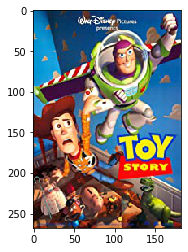

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0] [0, 0, 0, 1, 0, 0, 0, 1, 0, 0]


In [1]:
import csv
import os
from matplotlib import pyplot as plt
import numpy as np
from skimage import io

# Top 10 Genres in descending order:  
top_genres = ['Drama', 'Comedy', 'Romance', 'Action', 'Crime', 'Thriller','Horror', 'Adventure', 'Documentary', 'Mystery']
num_of_genres = len(top_genres)
# The useful outputs are saved in the lists below

# 1-d vectors
poster_ids = []
scores = [] 

# dimension: n x 10
genres = []


# contains np array of dim(100,100,3) for each input
images = [] 
line_count = 0
# set to 1
sample_limit = 1000
with open('ProcessedData.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        if line_count > 100:
            break
        line_count += 1
        
        pid = row[0]
        score = row[1]
        genre = row[2]
        genre_vector = []
        
        for i in range(0, len(top_genres)):
            if top_genres[i] in genre:
                genre_vector.append(1)
            else:
                genre_vector.append(0)
        
        try:
            filepath = f'./SamplePosters/{pid}.jpg'
            image = io.imread(filepath)
        except:
            print(f'{pid} not found')
            continue
        
        poster_ids.append(pid)
        scores.append(score)
        genres.append(genre_vector)
        images.append(np.array(image))

# Debug
print(poster_ids[0], images[0].shape)
plt.imshow(images[0], interpolation='nearest')
plt.show() 

print(genres[0], genres[1])